In [13]:
import numpy as np 
import os 
import nibabel as nib
import matplotlib.pyplot as plt
import nibabel.processing

In [3]:
data_list = os.listdir('./images')
label_list = os.listdir('./labels')

In [4]:
print(len(data_list))
print(len(label_list))

23
23


In [52]:
for i in range(len(data_list)):
    data= nib.load(f"./images/{data_list[i]}")
    data_np = data.get_fdata()
    print(data_list[i], data_np.shape)

DE.nii (256, 256, 252)
IBSR_01.nii.gz (256, 128, 256, 1)
IBSR_02.nii.gz (256, 128, 256, 1)
IBSR_03.nii.gz (256, 128, 256, 1)
IBSR_04.nii.gz (256, 128, 256, 1)
IBSR_05.nii.gz (256, 128, 256, 1)
IBSR_06.nii.gz (256, 128, 256, 1)
IBSR_07.nii.gz (256, 128, 256, 1)
IBSR_08.nii.gz (256, 128, 256, 1)
IBSR_09.nii.gz (256, 128, 256, 1)
IBSR_10.nii.gz (256, 128, 256, 1)
IBSR_11.nii.gz (256, 128, 256, 1)
IBSR_12.nii.gz (256, 128, 256, 1)
IBSR_13.nii.gz (256, 128, 256, 1)
IBSR_14.nii.gz (256, 128, 256, 1)
IBSR_15.nii.gz (256, 128, 256, 1)
IBSR_16.nii.gz (256, 128, 256, 1)
IBSR_17.nii.gz (256, 128, 256, 1)
IBSR_18.nii.gz (256, 128, 256, 1)
MB.nii (280, 320, 214)
MC.nii (262, 262, 216)
NY.nii (394, 466, 378)
WHL.nii (256, 256, 260)


In [54]:
for i in range(len(data_list)):
    data = nib.load(f'./images/{data_list[i]}')
    data_np = data.get_fdata()
    if (len(data_np.shape) == 4):
        data_np = data_np.squeeze(3)
    print(data_list[i], ':', data_np.shape)
    data = nib.Nifti1Image(data_np, np.eye(4))
    data = nibabel.processing.conform(data)
    data_np = data.get_fdata()
    # Intensity Normalization -1 ~ 1
    data_norm_np = (data_np - 128) / 128
    # Cropping => Size : (192, 192, 192)
    crop_data = data_norm_np[32:224, 32:224, 32:224]
    crop = nib.Nifti1Image(crop_data, np.eye(4))
    crop.to_filename(f'./images/tabs_data/{data_list[i]}')
    print(data_list[i], ':', crop_data.shape)

DE.nii : (256, 256, 252)
DE.nii : (192, 192, 192)
IBSR_01.nii.gz : (256, 128, 256)
IBSR_01.nii.gz : (192, 192, 192)
IBSR_02.nii.gz : (256, 128, 256)
IBSR_02.nii.gz : (192, 192, 192)
IBSR_03.nii.gz : (256, 128, 256)
IBSR_03.nii.gz : (192, 192, 192)
IBSR_04.nii.gz : (256, 128, 256)
IBSR_04.nii.gz : (192, 192, 192)
IBSR_05.nii.gz : (256, 128, 256)
IBSR_05.nii.gz : (192, 192, 192)
IBSR_06.nii.gz : (256, 128, 256)
IBSR_06.nii.gz : (192, 192, 192)
IBSR_07.nii.gz : (256, 128, 256)
IBSR_07.nii.gz : (192, 192, 192)
IBSR_08.nii.gz : (256, 128, 256)
IBSR_08.nii.gz : (192, 192, 192)
IBSR_09.nii.gz : (256, 128, 256)
IBSR_09.nii.gz : (192, 192, 192)
IBSR_10.nii.gz : (256, 128, 256)
IBSR_10.nii.gz : (192, 192, 192)
IBSR_11.nii.gz : (256, 128, 256)
IBSR_11.nii.gz : (192, 192, 192)
IBSR_12.nii.gz : (256, 128, 256)
IBSR_12.nii.gz : (192, 192, 192)
IBSR_13.nii.gz : (256, 128, 256)
IBSR_13.nii.gz : (192, 192, 192)
IBSR_14.nii.gz : (256, 128, 256)
IBSR_14.nii.gz : (192, 192, 192)
IBSR_15.nii.gz : (256, 128

In [55]:
for i in range(len(label_list)):
    label = nib.load(f'./labels/{label_list[i]}')
    label_np = label.get_fdata()
    if (len(label_np.shape) == 4):
        label_np = label_np.squeeze(3)
    print(label_list[i], ':', label_np.shape)
    label = nib.Nifti1Image(label_np, np.eye(4))
    label = nibabel.processing.conform(label)
    label_np = label.get_fdata()
    crop_label = label_np[32:224, 32:224, 32:224]
    crop = nib.Nifti1Image(crop_label, np.eye(4))
    crop.to_filename(f'./labels/tabs_label/{data_list[i]}')
    print(label_list[i],':', crop_label.shape)
    print()

DE.nii : (256, 256, 252)
DE.nii : (192, 192, 192)

IBSR_01.nii : (256, 128, 256)
IBSR_01.nii : (192, 192, 192)

IBSR_02.nii.gz : (256, 128, 256)
IBSR_02.nii.gz : (192, 192, 192)

IBSR_03.nii.gz : (256, 128, 256)
IBSR_03.nii.gz : (192, 192, 192)

IBSR_04.nii.gz : (256, 128, 256)
IBSR_04.nii.gz : (192, 192, 192)

IBSR_05.nii.gz : (256, 128, 256)
IBSR_05.nii.gz : (192, 192, 192)

IBSR_06.nii.gz : (256, 128, 256)
IBSR_06.nii.gz : (192, 192, 192)

IBSR_07.nii.gz : (256, 128, 256)
IBSR_07.nii.gz : (192, 192, 192)

IBSR_08.nii.gz : (256, 128, 256)
IBSR_08.nii.gz : (192, 192, 192)

IBSR_09.nii.gz : (256, 128, 256)
IBSR_09.nii.gz : (192, 192, 192)

IBSR_10.nii.gz : (256, 128, 256)
IBSR_10.nii.gz : (192, 192, 192)

IBSR_11.nii.gz : (256, 128, 256)
IBSR_11.nii.gz : (192, 192, 192)

IBSR_12.nii.gz : (256, 128, 256)
IBSR_12.nii.gz : (192, 192, 192)

IBSR_13.nii.gz : (256, 128, 256)
IBSR_13.nii.gz : (192, 192, 192)

IBSR_14.nii.gz : (256, 128, 256)
IBSR_14.nii.gz : (192, 192, 192)

IBSR_15.nii.gz : 

### Intensity Normalization 

In [27]:
import numpy as np
from sklearn.preprocessing import normalize

x = np.random.rand(1000)*10
#print(x)
norm1 = x / np.linalg.norm(x)
norm2 = normalize(x[:,np.newaxis], axis=0).ravel()
#print np.all(norm1 == norm2)

print(norm2)

[5.43099723e-02 2.33296374e-02 4.20428518e-02 2.16043435e-02
 2.89327497e-02 4.41757966e-02 3.95250434e-02 2.28633116e-02
 1.04097078e-02 2.70359745e-02 1.18977260e-02 3.63049850e-02
 4.15014594e-02 1.27573994e-02 2.08614120e-02 2.89430115e-02
 1.12513366e-02 1.20146363e-02 3.30050695e-02 1.85511641e-02
 1.00051988e-02 3.12537233e-02 1.74088631e-02 3.69102043e-02
 3.41997271e-02 2.13660097e-02 7.97245947e-03 1.83562055e-02
 4.33832144e-03 1.97656348e-02 8.63863763e-03 3.27976741e-03
 4.08051942e-02 1.87576693e-02 2.98914483e-02 1.15378648e-02
 5.40494783e-02 2.85766253e-02 1.98142527e-03 4.06215880e-02
 3.31287411e-02 4.35950221e-02 1.28577755e-02 4.14601596e-02
 9.70559006e-03 3.69337161e-02 3.19568097e-02 4.45456852e-02
 3.81205445e-02 2.75012116e-02 3.07844574e-02 7.91226945e-03
 4.02714337e-03 1.88377422e-02 1.81123237e-02 2.36390526e-02
 3.02322160e-02 3.60455009e-02 1.24628090e-02 7.06379024e-03
 5.34768516e-02 9.86180617e-03 2.85172283e-02 3.68446794e-02
 3.41395399e-02 5.319348

In [28]:
print (np.all(norm1 == norm2))

True


In [30]:
print(norm1.max())
print(norm1.min())
print(norm1.mean())
print(norm1.std())

0.05609611337130033
4.023215776313834e-06
0.02721539365032713
0.016103488704555108


In [33]:
img_path = './images/'
ibsr_01 = nib.load(img_path+data_list[0])

In [34]:
ibsr_01_np = ibsr_01.get_fdata()
def show_intensity_dist(ndarr):
    print("Max : ", ndarr.max())
    print("Max : ", ndarr.min())
    unique, counts = np.unique(ndarr, return_counts=True)
    print(dict(zip(unique, counts)))
    
show_intensity_dist(ibsr_01_np)

Max :  255.0
Max :  0.0
{0.0: 15262221, 5.0: 1, 7.0: 1, 9.0: 1, 10.0: 12, 11.0: 12, 12.0: 7, 13.0: 17, 14.0: 43, 15.0: 61, 16.0: 62, 17.0: 71, 18.0: 56, 19.0: 35, 20.0: 19, 21.0: 22, 22.0: 26, 23.0: 29, 24.0: 14, 25.0: 19, 26.0: 13, 27.0: 13, 28.0: 19, 29.0: 13, 30.0: 13, 31.0: 13, 32.0: 11, 33.0: 16, 34.0: 15, 35.0: 13, 36.0: 11, 37.0: 11, 38.0: 13, 39.0: 5, 40.0: 9, 41.0: 12, 42.0: 9, 43.0: 13, 44.0: 4, 45.0: 2, 46.0: 21, 47.0: 9, 48.0: 17, 49.0: 12, 50.0: 13, 51.0: 17, 52.0: 13, 53.0: 15, 54.0: 13, 55.0: 19, 56.0: 22, 57.0: 14, 58.0: 19, 59.0: 22, 60.0: 19, 61.0: 20, 62.0: 35, 63.0: 26, 64.0: 45, 65.0: 42, 66.0: 34, 67.0: 39, 68.0: 38, 69.0: 27, 70.0: 40, 71.0: 35, 72.0: 51, 73.0: 43, 74.0: 59, 75.0: 56, 76.0: 65, 77.0: 71, 78.0: 76, 79.0: 86, 80.0: 71, 81.0: 84, 82.0: 83, 83.0: 106, 84.0: 108, 85.0: 127, 86.0: 96, 87.0: 123, 88.0: 161, 89.0: 157, 90.0: 151, 91.0: 174, 92.0: 200, 93.0: 220, 94.0: 232, 95.0: 297, 96.0: 285, 97.0: 297, 98.0: 346, 99.0: 476, 100.0: 438, 101.0: 515, 102

In [41]:
ibsr_01_np_norm = (ibsr_01_np -128) / 128

In [42]:
show_intensity_dist(ibsr_01_np_norm)

Max :  0.9921875
Max :  -1.0
{-1.0: 15262221, -0.9609375: 1, -0.9453125: 1, -0.9296875: 1, -0.921875: 12, -0.9140625: 12, -0.90625: 7, -0.8984375: 17, -0.890625: 43, -0.8828125: 61, -0.875: 62, -0.8671875: 71, -0.859375: 56, -0.8515625: 35, -0.84375: 19, -0.8359375: 22, -0.828125: 26, -0.8203125: 29, -0.8125: 14, -0.8046875: 19, -0.796875: 13, -0.7890625: 13, -0.78125: 19, -0.7734375: 13, -0.765625: 13, -0.7578125: 13, -0.75: 11, -0.7421875: 16, -0.734375: 15, -0.7265625: 13, -0.71875: 11, -0.7109375: 11, -0.703125: 13, -0.6953125: 5, -0.6875: 9, -0.6796875: 12, -0.671875: 9, -0.6640625: 13, -0.65625: 4, -0.6484375: 2, -0.640625: 21, -0.6328125: 9, -0.625: 17, -0.6171875: 12, -0.609375: 13, -0.6015625: 17, -0.59375: 13, -0.5859375: 15, -0.578125: 13, -0.5703125: 19, -0.5625: 22, -0.5546875: 14, -0.546875: 19, -0.5390625: 22, -0.53125: 19, -0.5234375: 20, -0.515625: 35, -0.5078125: 26, -0.5: 45, -0.4921875: 42, -0.484375: 34, -0.4765625: 39, -0.46875: 38, -0.4609375: 27, -0.453125: 40, 

Text(0.5, 0.98, 'Center slices for Normalization image')

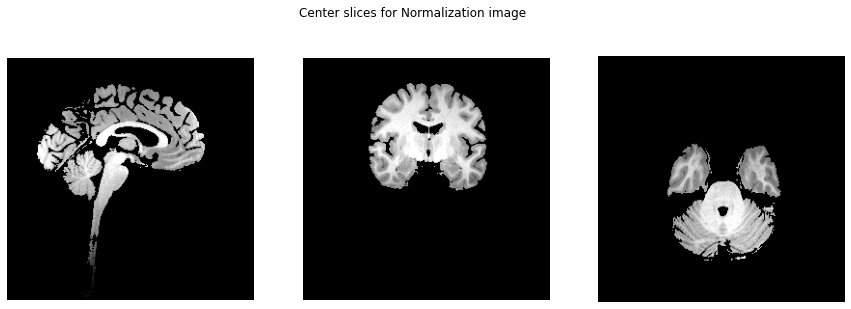

In [44]:
ibsr_01_norm = nib.Nifti1Image(ibsr_01_np_norm, np.eye(4))

def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    fig.set_figheight(5)
    fig.set_figwidth(15)
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin='lower')
        axes[i].axis('off')
        
seg_0 = ibsr_01_np_norm[128, :, :]
seg_1 = ibsr_01_np_norm[:,  128, :]
seg_2 = ibsr_01_np_norm[:, :, 128]
show_slices([seg_0, seg_1, seg_2])
# plt.axis('off')
plt.suptitle("Center slices for Normalization image")  